In [1]:
#pip3 install numpy==1.16.4
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [2]:
processDf = pd.read_csv('processDf.csv',index_col=0)  # load data set
processDf.head()

,Image Number,Total Size (mb)
Time Lapse (hr),,
0.40,50.0,290.0
0.79,100.0,579.0
1.22,150.0,869.0
1.77,200.0,1162.0
2.18,250.0,1460.0


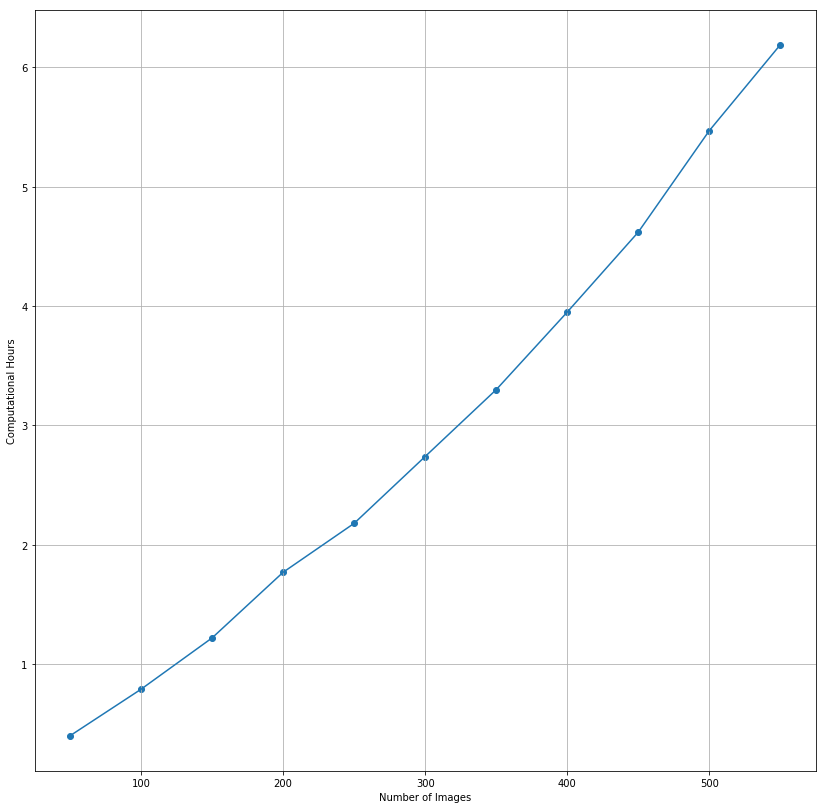

In [34]:
fig = plt.figure(figsize=(14,14)) 
plt.scatter(processDf['Image Number'],processDf.index)
plt.plot(processDf['Image Number'],processDf.index)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.grid()

In [5]:
nImages = processDf.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Hours = processDf.index.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(nImages, Hours)  # perform linear regression
Hours_pred = linear_regressor.predict(nImages) # make predictions
Hours_pred 

array([[0.08681818],
       [0.66272727],
       [1.23863636],
       [1.81454545],
       [2.39045455],
       [2.96636364],
       [3.54227273],
       [4.11818182],
       [4.69409091],
       [5.27      ],
       [5.84590909]])

In [20]:
#equation definition y = mx +c
#in this case Hours = m * nImages + c
m = round(linear_regressor.coef_[0][0],4)
c = round(linear_regressor.intercept_[0],2)
label = r'$Hours = %0.2f·ImagesNumber %+0.2f   $'%(m,c)
print(label)

$Hours = 0.01·ImagesNumber -0.49   $


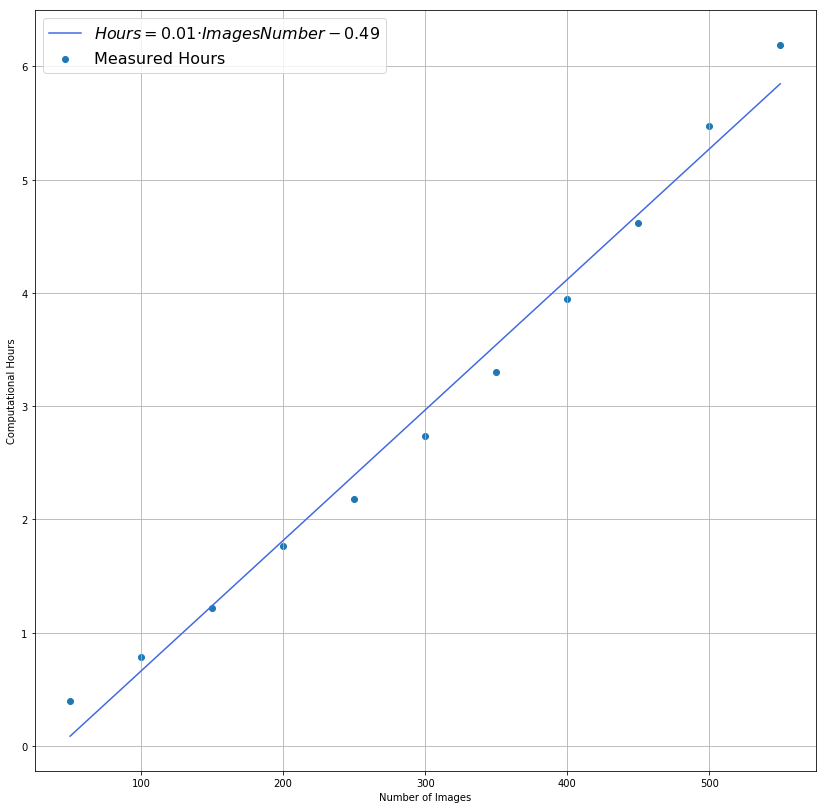

In [32]:
fig = plt.figure(figsize=(14,14)) 
#plt.scatter(processDf['Total Size (mb)'],processDf.index)
plt.scatter(processDf['Image Number'],processDf.index,label='Measured Hours')
plt.plot(nImages, Hours_pred, color='royalblue',label=label)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.legend(prop={'size': 16})
plt.grid()

In [24]:
def regressionOnItem(itemBegin,itemEnd,color):
    nImagesTot = processDf['Image Number'].values.reshape(-1, 1)  
    HoursTot = processDf.index.values.reshape(-1, 1)  
    nImagesSeg = processDf['Image Number'].iloc[itemBegin:itemEnd].values.reshape(-1, 1)  
    HoursSeg = processDf.index.values[itemBegin:itemEnd].reshape(-1, 1)  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(nImagesSeg, HoursSeg)  # perform linear regression
    Hours_pred = linear_regressor.predict(nImagesSeg) # make predictions
    m = linear_regressor.coef_[0][0]
    c = linear_regressor.intercept_[0]
    label = r'$Hours = %0.4f·numberImages %+0.4f   $'%(m,c)
    print(label)
    
    plt.plot(nImagesSeg, Hours_pred, color=color,label=label, )


$Hours = 0.0115·numberImages -0.4891   $
$Hours = 0.0091·numberImages -0.0900   $
$Hours = 0.0110·numberImages -0.5000   $
$Hours = 0.0151·numberImages -2.1340   $


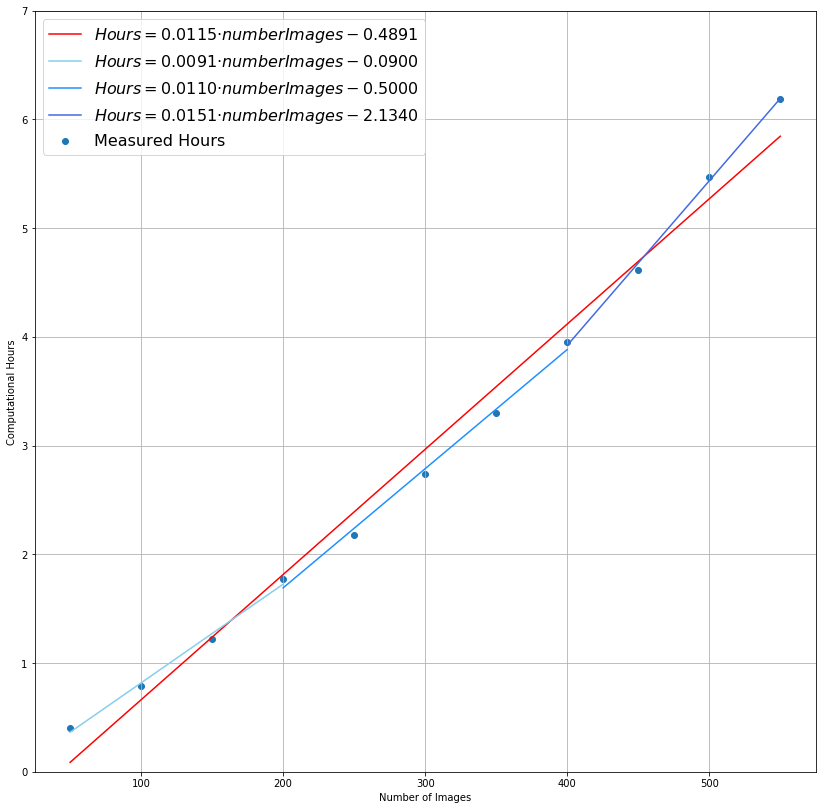

In [35]:
fig = plt.figure(figsize=(14,14)) 
plt.scatter(processDf['Image Number'],processDf.index,label='Measured Hours')
regressionOnItem(0,11,'red')
regressionOnItem(0,4,'skyblue')
regressionOnItem(3,8,'dodgerblue')
regressionOnItem(7,11,'royalblue')

plt.ylim(0,7)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.legend(prop={'size': 16})
plt.grid()